# SVM으로 주가 등락 분류
기존에 사용했던 Neural Network를 사용한 주가 변동성 분류가 아닌 SVM을 사용하여서도 분류를 해보고 두 방법중 어느 것이 더 정확도가 높은지 비교해본다.

In [1]:
# 사용할 데이터의 형태
data_type = '19'      # '1' : summarize X,개별 기사   '2' : summarize X,날짜별 기사
                    # '3' : summarize O,개별 기사   '4' : summarize O,날짜별 기사
normalized = 'done' # 'done' : 데이터 행별 normalize한 데이터     'not' : 데이터 행별 normalize 안한 데이터
erased_word = ''    # 제거된 단어 형태
num_word = '6000'   # 사용할 단어 수

In [2]:
# 생성된 training, test의 x,y값을 pickle의 형태로 저장
import pickle
import os
path = os.getcwd()+'/pickles/'
if erased_word != '':
    erased_word = '_'+erased_word
with open(path+data_type+'train_x_'+str(num_word)+'_'+normalized+erased_word+'.pickle', 'rb') as f:
    train_x = pickle.load(f)
with open(path+data_type+'train_y_'+str(num_word)+'_'+normalized+erased_word+'.pickle', 'rb') as f:
    train_y = pickle.load(f)
with open(path+data_type+'train2_x_'+str(num_word)+'_'+normalized+erased_word+'.pickle', 'rb') as f:
    train2_x = pickle.load(f)
with open(path+data_type+'train2_y_'+str(num_word)+'_'+normalized+erased_word+'.pickle', 'rb') as f:
    train2_y = pickle.load(f)
with open(path+data_type+'test_x_'+str(num_word)+'_'+normalized+erased_word+'.pickle', 'rb') as f:
    test_x = pickle.load(f)
with open(path+data_type+'test_y_'+str(num_word)+'_'+normalized+erased_word+'.pickle', 'rb') as f:
    test_y = pickle.load(f)
with open(path+data_type+'test2_x_'+str(num_word)+'_'+normalized+erased_word+'.pickle', 'rb') as f:
    test2_x = pickle.load(f)
with open(path+data_type+'test2_y_'+str(num_word)+'_'+normalized+erased_word+'.pickle', 'rb') as f:
    test2_y = pickle.load(f)

In [3]:
# numpy 사용하여 float로 바꾸어주는 과정
import numpy as np
x_train = np.asarray(train_x).astype('float32')
y_train = np.asarray(train_y).astype('float32')
x_test = np.asarray(test_x).astype('float32')
y_test = np.asarray(test_y).astype('float32')

In [8]:
from sklearn.svm import SVC
result = []
x = x_train
y=[]
x_axis = []
y_axis = []
for i in y_train:
    if i[0]==1 and i[1] ==0 and i[2] ==0:
        y.append(-1)
    elif i[0] ==0 and i[1] == 1 and i[2] == 0:
        y.append(0)
    else:
        y.append(1)
y = np.asarray(y)
for i in range(4,9):
    count = 0
    a = 20 * i
    b = 10 * i
    x_axis.append(a)
    y_axis.append(b)
    classifier = SVC(kernel = 'poly',C = a ,gamma = b)
    classifier.fit(x,y)
    for i in range(len(x)):
        if classifier.predict([x[i]]) == y[i]:
            count = count + 1
    result.append(count/len(x))
    
result = np.asarray(result)

In [9]:
#test 정리
xx = x_test
yy=[]
for i in y_test:
    if i[0]==1 and i[1] ==0 and i[2] ==0:
        yy.append(-1)
    elif i[0] ==0 and i[1] == 1 and i[2] == 0:
        yy.append(0)
    else:
        yy.append(1)
        


In [10]:
print(x_axis)
print(y_axis)
print(result)

[80, 100, 120, 140, 160]
[40, 50, 60, 70, 80]
[0.66944444 0.80833333 0.90833333 0.97222222 0.99444444]


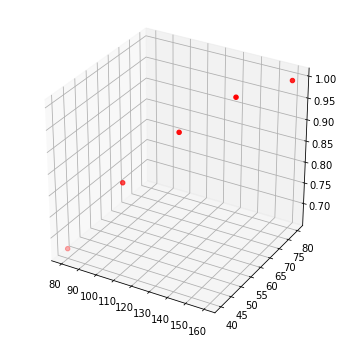

In [11]:
   from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

x_axis = np.asarray(x_axis)
y_axis = np.asarray(y_axis)\

xmin, xmax, ymin, ymax, zmin, zmax = 0, 100, 0, 50, 0, 1.0
plt.rcParams["figure.figsize"] = (6, 6)

fig=plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(x_axis,y_axis,result,color='r',marker='o')

plt.show()

# 중간점검
c = 140 gamma = 70부터 트레이닝 정확도가 약 97%정도가 나왔으므로 c 140, 160을 대상으로 gamma를 해당 c까지 올리면서 확인해보고자 한다.

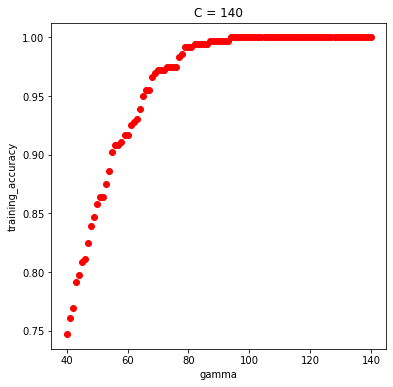

In [13]:
# C = 140
result_c140 = []
x_axis_c140 = []
for i in range(40,141):
    x_axis_c140.append(i)
    classifier = SVC(kernel = 'poly',C = 140 ,gamma = i)
    classifier.fit(x,y)
    count = 0
    for i in range(len(x)):
        if classifier.predict([x[i]]) == y[i]:
            count = count + 1
    result_c140.append(count/len(x))

x_axis_c140 = np.asarray(x_axis_c140)
y_axis_c140 = np.asarray(result_c140)
plt.title('C = 140')
plt.xlabel('gamma')
plt.ylabel('training_accuracy')
plt.scatter(x_axis_c140,y_axis_c140,color='r',marker='o')

In [14]:
print(y_axis_c140)
print(len(y_axis_c140))

[0.74722222 0.76111111 0.76944444 0.79166667 0.79722222 0.80833333
 0.81111111 0.825      0.83888889 0.84722222 0.85833333 0.86388889
 0.86388889 0.875      0.88611111 0.90277778 0.90833333 0.90833333
 0.91111111 0.91666667 0.91666667 0.925      0.92777778 0.93055556
 0.93888889 0.95       0.95555556 0.95555556 0.96666667 0.96944444
 0.97222222 0.97222222 0.97222222 0.975      0.975      0.975
 0.975      0.98333333 0.98611111 0.99166667 0.99166667 0.99166667
 0.99444444 0.99444444 0.99444444 0.99444444 0.99444444 0.99722222
 0.99722222 0.99722222 0.99722222 0.99722222 0.99722222 0.99722222
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1. 

In [18]:
print(y_axis_c140[25])

0.95


In [27]:
x_axis_c140_test = []
y_axis_c140_test = []
for num in range(80,250):
    x_axis_c140_test.append(num)
    classifier = SVC(kernel = 'poly',C = 140 ,gamma = num)
    classifier.fit(x,y)
    count = 0
    for i in range(len(xx)):
        if classifier.predict([xx[i]]) == yy[i]:
            count = count + 1
    y_axis_c140_test.append(count/len(xx))

x_axis_c140_test = np.asarray(x_axis_c140_test)
y_axis_c140_test = np.asarray(y_axis_c140_test)
print(y_axis_c140_test)
print(len(y_axis_c140_test))

[0.55619597 0.55907781 0.55619597 0.55907781 0.55331412 0.55907781
 0.56195965 0.55907781 0.55907781 0.55907781 0.55619597 0.55907781
 0.55331412 0.55907781 0.56195965 0.5648415  0.57060519 0.57060519
 0.57060519 0.57348703 0.57348703 0.57060519 0.57060519 0.57060519
 0.57348703 0.57348703 0.57636888 0.57636888 0.57636888 0.57636888
 0.57925072 0.58213256 0.58213256 0.58213256 0.57925072 0.57925072
 0.57925072 0.57925072 0.57925072 0.57925072 0.57925072 0.57925072
 0.57925072 0.57925072 0.57925072 0.57925072 0.57925072 0.57925072
 0.57925072 0.57925072 0.57925072 0.57925072 0.57925072 0.57925072
 0.57925072 0.57925072 0.57925072 0.57925072 0.57925072 0.57925072
 0.57925072 0.57925072 0.57925072 0.57925072 0.57925072 0.57925072
 0.57925072 0.57925072 0.57925072 0.57925072 0.57925072 0.57925072
 0.57925072 0.57925072 0.57925072 0.57925072 0.57925072 0.57925072
 0.57925072 0.57925072 0.57925072 0.57925072 0.57925072 0.57925072
 0.57925072 0.57925072 0.57925072 0.57925072 0.57925072 0.5792

# C = 140 결론
test_accuracy가 약 57.9%의 정확도에서 더이상 오르지 않는 모습을 보여주고 있다.

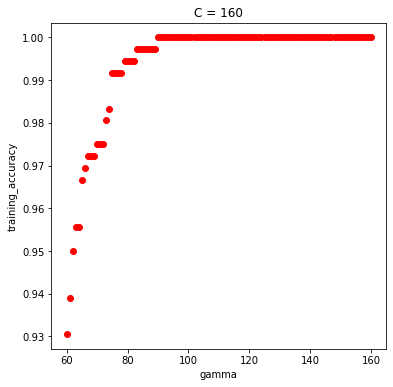

In [21]:
#c = 160
result_c160 = []
x_axis_c160 = []
for i in range(60,161):
    x_axis_c160.append(i)
    classifier = SVC(kernel = 'poly',C = 160 ,gamma = i)
    classifier.fit(x,y)
    count = 0
    for i in range(len(x)):
        if classifier.predict([x[i]]) == y[i]:
            count = count + 1
    result_c160.append(count/len(x))

x_axis_c160 = np.asarray(x_axis_c160)
y_axis_c160 = np.asarray(result_c160)
plt.title('C = 160')
plt.xlabel('gamma')
plt.ylabel('training_accuracy')
plt.scatter(x_axis_c160,y_axis_c160,color='r',marker='o')

In [22]:
print(y_axis_c160)

[0.93055556 0.93888889 0.95       0.95555556 0.95555556 0.96666667
 0.96944444 0.97222222 0.97222222 0.97222222 0.975      0.975
 0.975      0.98055556 0.98333333 0.99166667 0.99166667 0.99166667
 0.99166667 0.99444444 0.99444444 0.99444444 0.99444444 0.99722222
 0.99722222 0.99722222 0.99722222 0.99722222 0.99722222 0.99722222
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.       

In [26]:
x_axis_c160_test = []
y_axis_c160_test = []
for num in range(80,201):
    x_axis_c160_test.append(num)
    classifier = SVC(kernel = 'poly',C = 160 ,gamma = num)
    classifier.fit(x,y)
    count = 0
    for i in range(len(xx)):
        if classifier.predict([xx[i]]) == yy[i]:
            count = count + 1
    y_axis_c160_test.append(count/len(xx))

x_axis_c160_test = np.asarray(x_axis_c160_test)
y_axis_c160_test = np.asarray(y_axis_c160_test)
print(y_axis_c160_test)
print(len(y_axis_c160_test))

[0.55331412 0.55907781 0.55907781 0.55907781 0.55907781 0.55907781
 0.55619597 0.55907781 0.55331412 0.56195965 0.56195965 0.5648415
 0.57060519 0.57060519 0.57348703 0.57348703 0.57060519 0.57060519
 0.57060519 0.57348703 0.57348703 0.57636888 0.57636888 0.57636888
 0.57636888 0.57925072 0.58213256 0.58213256 0.58213256 0.57925072
 0.57925072 0.57925072 0.57925072 0.57925072 0.57925072 0.57925072
 0.57925072 0.57925072 0.57925072 0.57925072 0.57925072 0.57925072
 0.57925072 0.57925072 0.57925072 0.57925072 0.57925072 0.57925072
 0.57925072 0.57925072 0.57925072 0.57925072 0.57925072 0.57925072
 0.57925072 0.57925072 0.57925072 0.57925072 0.57925072 0.57925072
 0.57925072 0.57925072 0.57925072 0.57925072 0.57925072 0.57925072
 0.57925072 0.57925072 0.57925072 0.57925072 0.57925072 0.57925072
 0.57925072 0.57925072 0.57925072 0.57925072 0.57925072 0.57925072
 0.57925072 0.57925072 0.57925072 0.57925072 0.57925072 0.57925072
 0.57925072 0.57925072 0.57925072 0.57925072 0.57925072 0.57925

# C = 160 결론
test_accuracy가 약 57.9%에서 더 증가하지 않고 있다.